In [1]:
from random import seed
from random import random
from math import exp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[0.1, 0.2, 0.3]}, {'weights':[0.1, 0.2, 0.3]}]
	network.append(hidden_layer)
	output_layer = [{'weights':[0.2, 0.1, 0.5]}, {'weights':[0.2, 0.1, 0.4]}]
	network.append(output_layer)
	return network

In [3]:
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

In [4]:
def transfer(activation):
	return (exp(activation) - exp(-activation)) / (exp(activation) + exp(-activation))

In [5]:
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

In [6]:
def transfer_derivative(output):
	return (1.0 - output ** 2)

In [7]:
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])


In [8]:
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

In [9]:
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		if(epoch > 50000):
			l_rate = 1/epoch * 100
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[int(row[-1])] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		if(epoch % 100 == 0):
	  		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

In [10]:
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

[[{'weights': [0.1, 0.2, 0.3]}, {'weights': [0.1, 0.2, 0.3]}], [{'weights': [0.2, 0.1, 0.5]}, {'weights': [0.2, 0.1, 0.4]}]]
>epoch=0, lrate=0.100, error=4.949
>epoch=100, lrate=0.100, error=0.322
>epoch=200, lrate=0.100, error=0.087
>epoch=300, lrate=0.100, error=0.050
>epoch=400, lrate=0.100, error=0.035
>epoch=500, lrate=0.100, error=0.027
>epoch=600, lrate=0.100, error=0.022
>epoch=700, lrate=0.100, error=0.018
>epoch=800, lrate=0.100, error=0.015
>epoch=900, lrate=0.100, error=0.013
[[{'weights': [-1.417457417419993, 1.6584789785868526, -0.1934273486840623], 'output': -0.9982154189767177, 'delta': 5.549215671156203e-05}, {'weights': [-2.4933309694733152, 2.622095064421717, 0.7765564619829767], 'output': -0.9997367137473195, 'delta': 1.689949157552232e-05}], [{'weights': [0.48886806504695524, 1.0513478494222745, 1.517199509445146], 'output': -0.031193133173931544, 'delta': 0.03116278189484782}, {'weights': [0.5289161954436004, -1.7524586726047116, 1.225400747162818], 'output': 0.98

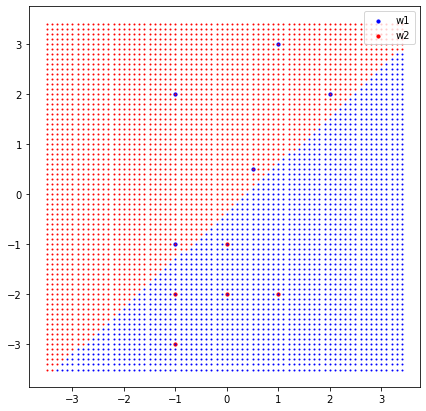

In [11]:
#As no dataset was given, I took a data set from previous assignment and trained the nueral network
w1 = np.array([[2, 2, 0], [-1, 2, 0], [1, 3, 0], [-1, -1, 0], [0.5, 0.5, 0]])
w2 = np.array([[-1, -3, 1], [0, -1, 1], [1, -2, 1], [-1, -2, 1], [0, -2, 1]])
dataset = np.concatenate([w1, w2], axis = 0)
w1 = np.array([[2, 2], [-1, 2], [1, 3], [-1, -1], [0.5, 0.5]])
w2 = np.array([[-1, -3], [0, -1], [1, -2], [-1, -2], [0, -2]])
f, ax = plt.subplots(figsize=(7, 7))
c1, c2, c3 = 'b', 'r', 'm'

ax.scatter(*w1.T, c=c1,s = 10, label = "w1")
ax.legend()
ax.scatter(*w2.T, c=c2, s = 10, label = "w2")
ax.legend()

n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 1, n_outputs)
print(network)
train_network(network, dataset, 0.1, 1000, n_outputs)
print(network)
x = np.arange(-3.5, 3.5, 0.1)
y = np.arange(-3.5, 3.5, 0.1)
print(predict(network, [0.1, 0.2]))
for layer in network:
	print(layer)

for i in range(len(x)):
	for j in range(len(y)):
		pt = [x[i], y[j]]
		if(predict(network, pt) == 0):
			c = 'r'
		else:
			c = 'b'
		ax.scatter(x[i], y[j], c = c, s = 1)



plt.show()
